# Classifying given datapoints into clusters, Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./basic1.csv")

In [3]:
df.head()

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       9794 non-null   float64
 1   y       9794 non-null   float64
 2   color   9794 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 229.7 KB


There are 9,794 rows and 3 columns, where first 2 columns are are Independent features

In [5]:
df.describe()

,x,y,color
count,9794.000000,9794.000000,9794.000000
mean,248.146076,223.808189,1.070656
std,140.455822,98.769227,1.041717
min,37.595949,13.577945,0.000000
25%,108.772908,150.568069,0.000000
50%,247.643438,214.161286,1.000000
75%,361.518553,288.180956,2.000000
max,560.333464,525.737947,3.000000


In [6]:
df["color"].value_counts() #there are 4 unique classes

0    3816
1    2646
2    2156
3    1176
Name: color, dtype: int64

<AxesSubplot:xlabel='x', ylabel='y'>

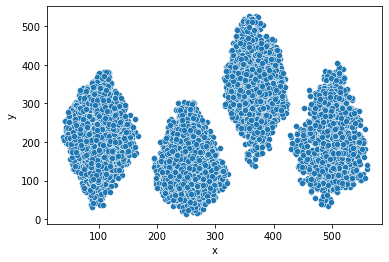

In [7]:
sns.scatterplot(x = "x", y="y", data = df)

### Standard Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop("color", axis = 1)

In [10]:
sclr = StandardScaler()

In [11]:
sclr.fit(X)

StandardScaler()

In [12]:
X = sclr.transform(X)

In [13]:
X

array([[-1.20141977, -0.71861844],
       [-1.06871665, -0.37359179],
       [-0.05387803, -1.77528428],
       ...,
       [ 1.76805797,  0.94918023],
       [ 1.68434982,  0.28042445],
       [ 0.78309877,  2.24436368]])

## Clustering with the help of KMeans Algorithm

In [14]:
from sklearn.cluster import KMeans

In [15]:
k = 4 # number of clusters

In [16]:
kmeans = KMeans(n_clusters=k, algorithm="full", max_iter=1000)

In [17]:
y_pred = kmeans.fit_predict(X)

<AxesSubplot:>

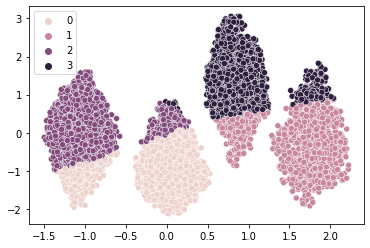

In [18]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_pred)

### Above classification by KMeans was not done well so now we use *DBSCAN Algo* which is more density focussed

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [21]:
y_pred = dbscan.fit_predict(X)

<AxesSubplot:>

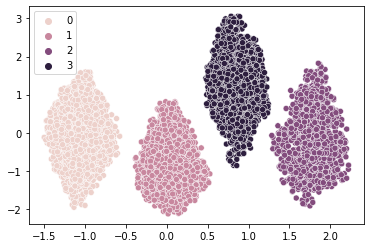

In [22]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_pred)

**Clearly there are 4 clusters identified by our Algorithm**